Y=m*X+c
m = 0.006407179487179485 c = 0.4242338461538462


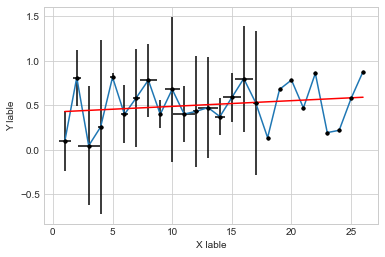

In [37]:
import xlrd, xlwt

import os

import numpy as np

os.chdir("/Users/georgy/Downloads/seminar5")
exc_r = xlrd.open_workbook('data.xls')

sheet = exc_r.sheet_by_index(0)

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.xlabel("X lable")
plt.ylabel("Y lable")
plt.errorbar(sheet.col_values(0), sheet.col_values(1), yerr=sheet.col_values(2), fmt='.k');
plt.errorbar(sheet.col_values(0), sheet.col_values(1), xerr=sheet.col_values(3), fmt='.k');
plt.plot(sheet.col_values(0), sheet.col_values(1))

X=sheet.col_values(0)
Y=sheet.col_values(1)

X_mean = np.mean(X)
Y_mean = np.mean(Y)

num = 0
den = 0
for i in range(len(X)):
    num += (X[i] - X_mean)*(Y[i] - Y_mean)
    den += (X[i] - X_mean)**2
m = num / den
c = Y_mean - m*X_mean

print ("Y=m*X+c")
print ("m =", m,"c =", c)

plt.plot([min(X), max(X)], [m*min(X) + c, m*max(X) + c], color='red')
plt.show()